Importing required libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Reading the data from the .csv file using pandas and copying it into a another variable to maintain the raw data.

In [ ]:
rawData = pd.read_csv("insurance.csv")
actualData = rawData.copy()
actualData

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Checking if there are any null values. In this case there aren't any.

In [ ]:
actualData.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Changing smoker region and sex's type as category.

In [ ]:
actualData["smoker"] = actualData["smoker"].astype("category")
actualData["region"] = actualData["region"].astype("category")
actualData["sex"] = actualData["sex"].astype("category")
actualData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


Examining the distribution of bmi using KDE plot.

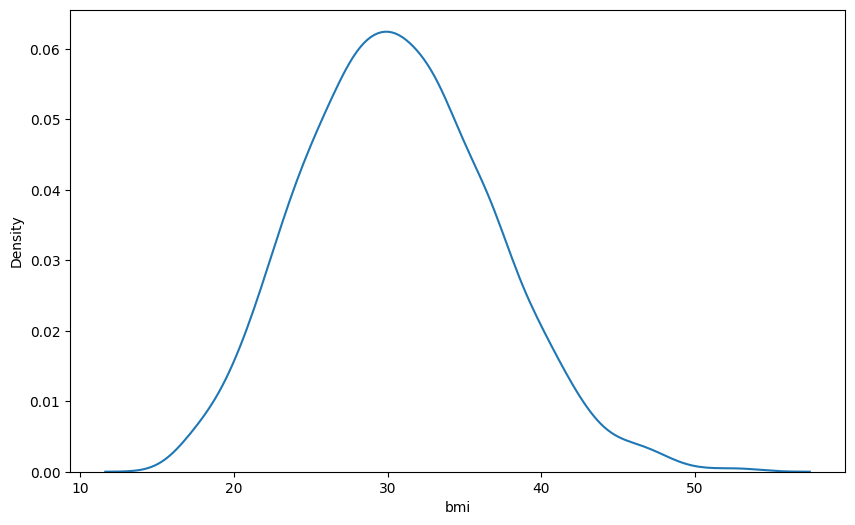

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(actualData["bmi"])
plt.xlabel("bmi")
plt.ylabel("Density")
plt.show()

After sketching the relation between "smoker" and "charges", it looks like if a person is a smoker that person's charge would have a tendency to be higher. However the outlier data in the "no" part of the graph shows that other data might create exceptions.

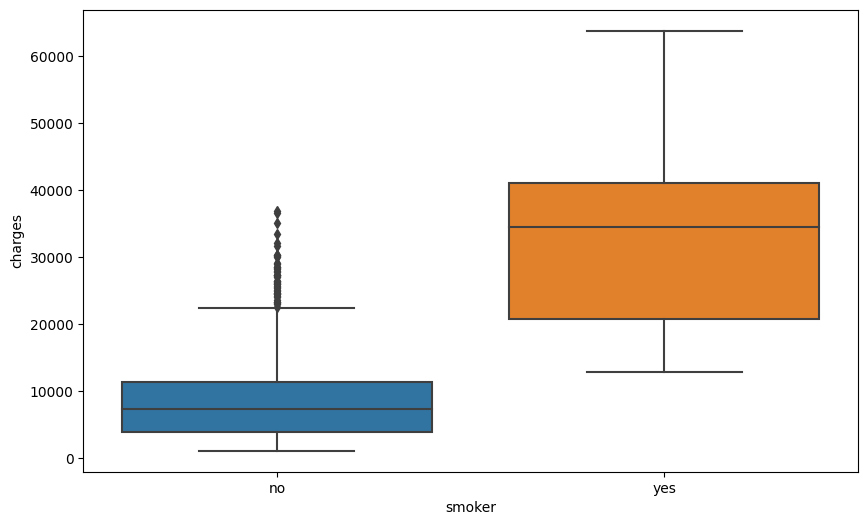

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= "smoker", y="charges", data=actualData)
plt.xlabel("smoker")
plt.ylabel("charges")
plt.show()


Examining the relation between sex and bmi shows us that male bmi is probably not dependent to sex of the people.

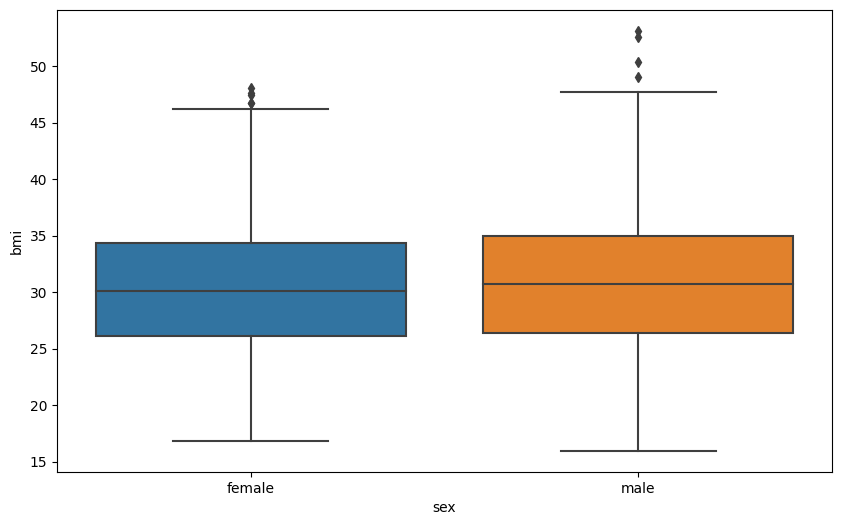

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= "sex", y="bmi", data=actualData)
plt.xlabel("sex")
plt.ylabel("bmi")
plt.show()


Examining the data shows us that the region with most children is southeast with around 382 children.

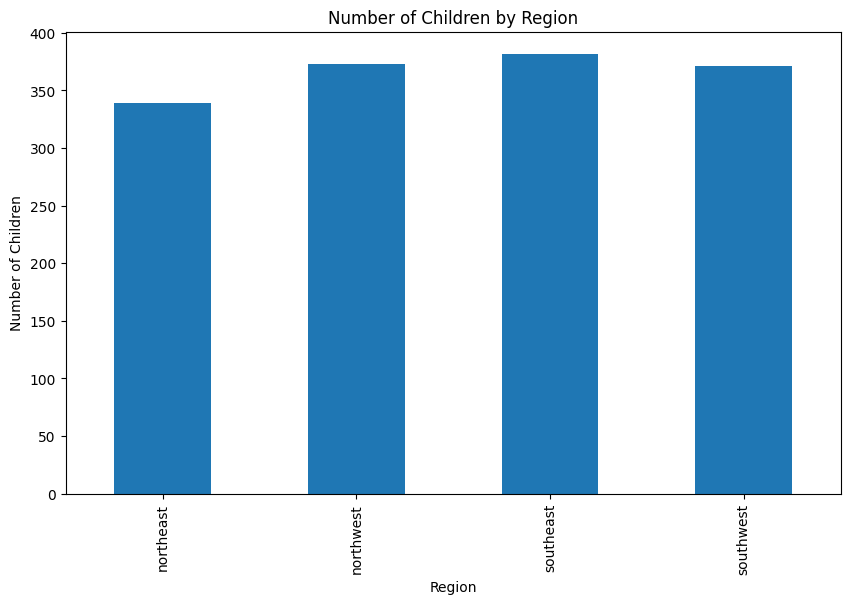

The region with the most children is 'southeast' with 382 children.


In [64]:
region_children = actualData.groupby("region")["children"].sum()
max_region = region_children.idxmax()
max_children = region_children.max()
region_children.plot(kind="bar", figsize=(10, 6))
plt.title("Number of Children by Region")
plt.xlabel("Region")
plt.ylabel("Number of Children")
plt.show()
print(f"The region with the most children is '{max_region}' with {max_children} children.")

The graph below shows that there isn't a particular relationship between age and bmi.

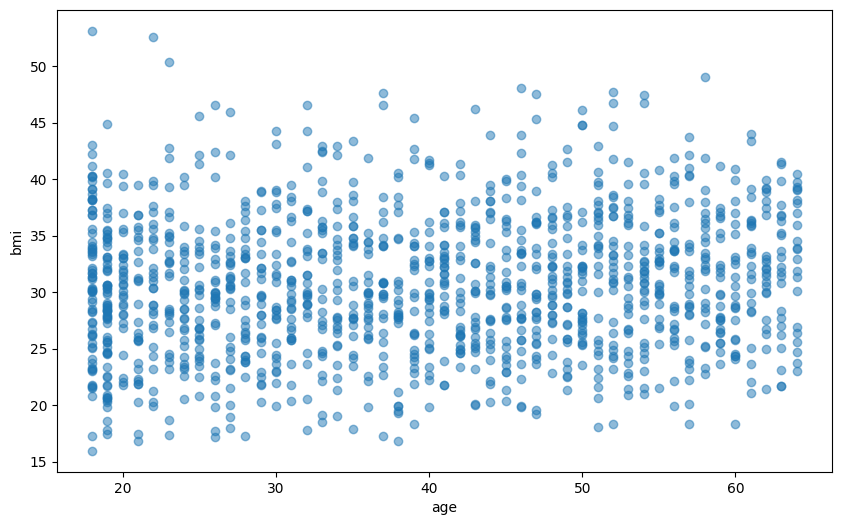

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(actualData["age"], actualData["bmi"], alpha=0.5)
plt.xlabel("age")
plt.ylabel("bmi")
plt.show()

It can be seen that the margin of bmi gets smaller as the number of children increases. However it seems there aren't enough data for higher number of children.

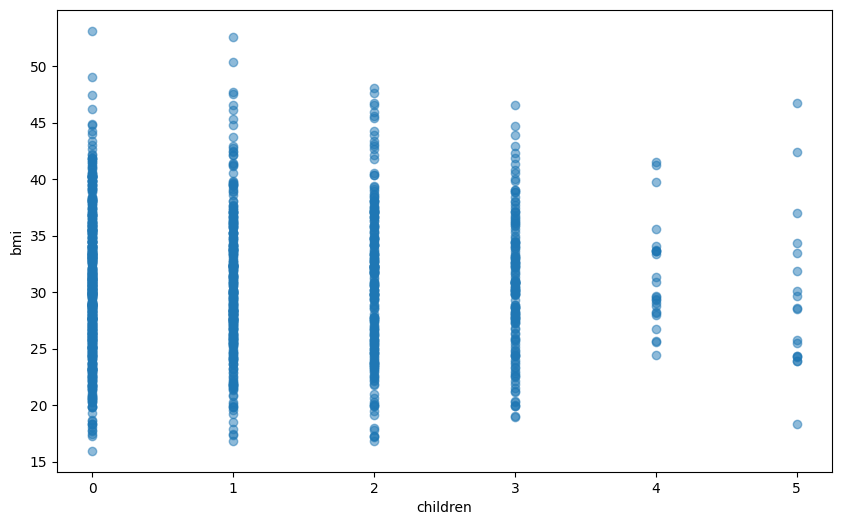

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(actualData["children"], actualData["bmi"], alpha=0.5)
plt.xlabel("children")
plt.ylabel("bmi")
plt.show()

The box graph shows that there are some outliers in the bmi variable.

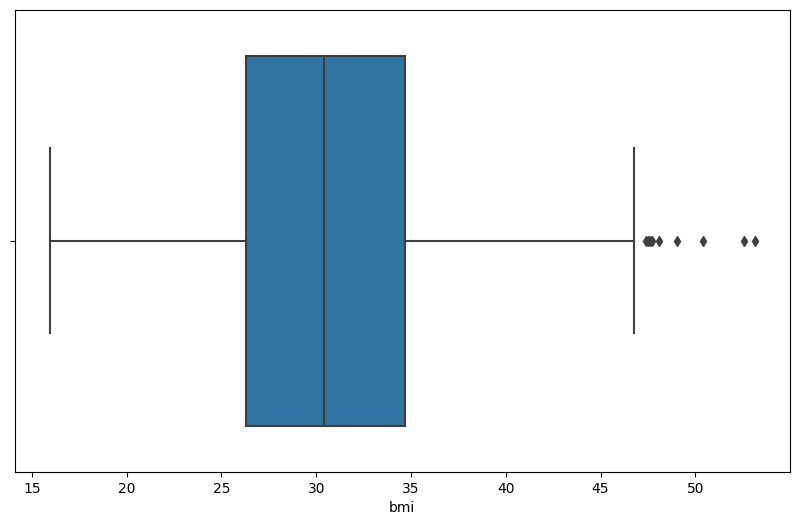

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=actualData["bmi"])
plt.xlabel("bmi")
plt.show()

By drawing a regression curve it seems that charges increase as the bmi of a person increases.

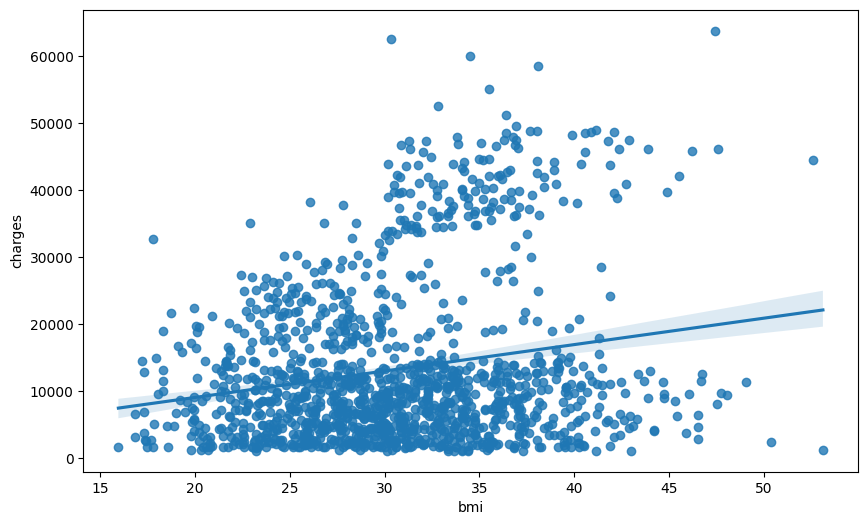

In [68]:
plt.figure(figsize=(10, 6))
sns.regplot(x="bmi", y="charges", data=actualData)
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()

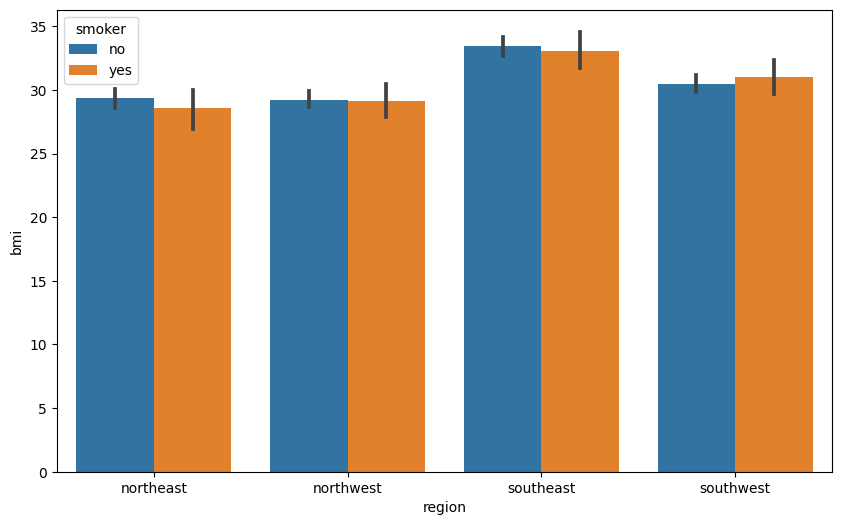

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x="region", y="bmi", hue="smoker", data=actualData)
plt.xlabel("region")
plt.ylabel("bmi")
plt.show()

Labeling categorical variables so the alghoritm can process it.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

regionLabel = actualData["region"]
smokerLabel = actualData["smoker"]
sexLabel = actualData["sex"]
encoded_labels = label_encoder.fit_transform(regionLabel)
encoded_labels = label_encoder.fit_transform(smokerLabel)
encoded_labels = label_encoder.fit_transform(sexLabel)

In [75]:
from sklearn.preprocessing import StandardScaler
string_columns = actualData.select_dtypes(include=["category"]).columns
encoded_data = pd.get_dummies(actualData, columns=string_columns)

numerical_data = encoded_data.select_dtypes(include=["int", "float"])
categorical_data = encoded_data.drop(columns=numerical_data.columns)

scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_data.columns)

actualData = pd.concat([scaled_numerical_df, categorical_data], axis=1)

Splitting the dataset

In [76]:
from sklearn.model_selection import train_test_split

y = actualData["charges"]
X = actualData.drop(["charges"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

We will test Linear regression, ridge regreession and lasso regression for this dataset and choose the best performing one.

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

linearModel = LinearRegression()
ridgeModel = Ridge(alpha=1.0)
lassoModel = Lasso(alpha=1.0)

linearModel.fit(X_train, y_train)
ridgeModel.fit(X_train, y_train)
lassoModel.fit(X_train, y_train)

linearPredictions = linearModel.predict(X_test)
ridgePredictions = ridgeModel.predict(X_test)
lassoPredictions = lassoModel.predict(X_test)

After using MSE and MAE metrics. It can be seen that linear regression and ridge regression give almost the same outputs, while lasso regression's answers are far off. In this case either linear or ridge regression is succesful.

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


linearMSE = mean_squared_error(y_test, linearPredictions)
linearMAE = mean_absolute_error(y_test, linearPredictions)
ridgeMSE = mean_squared_error(y_test, ridgePredictions)
ridgeMAE = mean_absolute_error(y_test, ridgePredictions)
lassoMSE = mean_squared_error(y_test, lassoPredictions)
lassoMAE = mean_absolute_error(y_test, lassoPredictions)

print(f"Mean Squared Error for linear regression is {linearMSE}")
print(f"Mean Absolute Error for linear regression is {linearMAE}")
print(f"Mean Squared Error for ridge regression is {ridgeMSE}")
print(f"Mean Absolute Error for ridge regression is {ridgeMAE}")
print(f"Mean Squared Error for lasso regression is {lassoMSE}")
print(f"Mean Absolute Error for lasso regression is {lassoMAE}")

Mean Squared Error for linear regression is 0.25868389571996553
Mean Absolute Error for linear regression is 0.33816447915875325
Mean Squared Error for ridge regression is 0.2585983338333305
Mean Absolute Error for ridge regression is 0.3384148577509958
Mean Squared Error for lasso regression is 0.955379258308616
Mean Absolute Error for lasso regression is 0.7410428329596261
